In [1]:
# noexport
!typech results_summary.ipynb

[NbConvertApp] Converting notebook results_summary.ipynb to python


In [2]:
import jsonmemo as jsonmemo_module
jsonmemo_module.set_lowmem(True)

We know users have differing preferences for how difficult they want their interventions to be.

Ie, if you ask them during onboarding the following question "How aggressive would you like HabitLab to be in reducing your time online" then the answers are as follows

In [3]:
from initial_difficulty_choice_utils import plot_initial_chosen_difficulties_per_install_percent
plot_initial_chosen_difficulties_per_install_percent()

In [4]:
from initial_difficulty_choice_utils import plot_initial_chosen_difficulties_per_install_percent
plot_initial_chosen_difficulties_per_install_percent()

First study: all users are in the 10-second countdown version of the interface. We vary the frequency with which they are shown the prompt. 4 conditions: shown prompt on 100% of visits, 50%, 25%, 0%.

Are there costs to asking what difficulty the user wants? (If there aren’t we can just ask every visit and declare mission accomplished)

The actual time cost is actually rather low, a mode of 1.2 seconds time to answer the question


In [5]:
from cost_utils_libs import plot_latency_for_all_users_nonrandom
plot_latency_for_all_users_nonrandom()

Unfortunately conditions where you ask users have significantly higher attrition rates. Key difference seems to be more of “do you ask them at all” rather than how often (doesn’t seem to be much difference between 1.0 and 0.5).

/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

载入需要的程辑包：ggplot2


/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

载入需要的程辑包：ggpubr


/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

载入需要的程辑包：magrittr




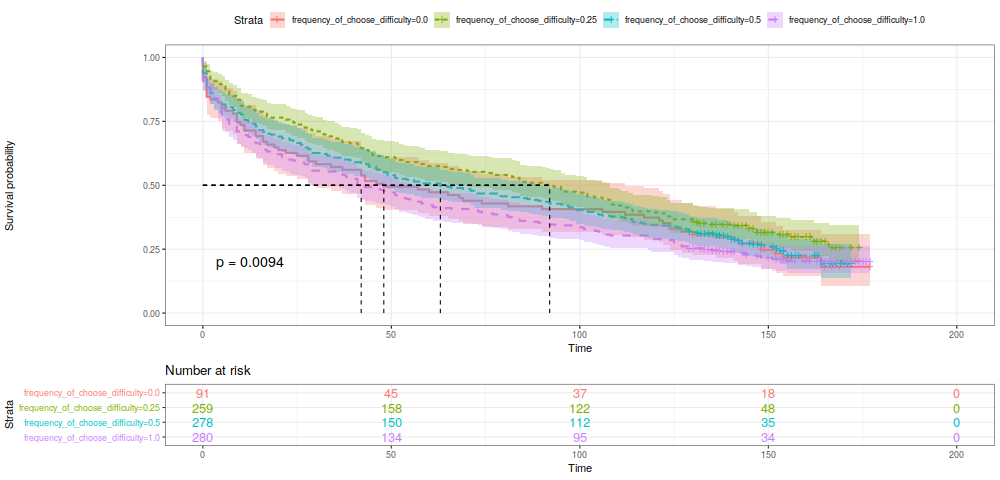

In [6]:
from retention_utils import make_attrition_plot_by_install_for_frequency_of_choose_difficulty
make_attrition_plot_by_install_for_frequency_of_choose_difficulty()

Thankfully asking people more often doesn’t seem to drive them toward choosing easier interventions. Below plot shows time elapsed since last time the user last chose a difficulty, vs the difficulty they chose. Seems pretty stable over time (visualized up to 7 days)

In [7]:
from cost_utils_libs import plot_difficulty_chosen_since_first_impression_per_hour_oneweek
plot_difficulty_chosen_since_first_impression_per_hour_oneweek()

Does users’ willingness to answer the question change over time?

If we look at it from the perspective of time from install, it does not. Weeks elapsed since install, versus percentage of sessions where the user chooses to answer the choose difficulty prompt. this is restricted only to users who remained installed for at least 7 full weeks. Seems to be fairly stable (mysterious fall at week 6 aside)


In [8]:
from cost_utils_libs import plot_response_rate_since_first_impression_per_week
plot_response_rate_since_first_impression_per_week()

If we plot it at the level of time elapsed since they last saw the prompt, the response rate is lower if they were asked within the past day, but is stable after a day

In [9]:
from cost_utils_libs import plot_response_rate_since_last_impression_per_hour_oneweek
plot_response_rate_since_last_impression_per_hour_oneweek()

Alternative visualization, showing it at the individual user level. Still doesn’t seem to be changing over time. heatmap of whether the user makes a choice (1) or goes for default randomly chosen difficulty after 10-second timeout (0). 174 users (x-axis) visualized over the first 400 difficulty choice prompts (y-axis). restricted to users who were in the 0.5 ab-test (the prompt is shown 50% of the time, other 50% of the time it goes with most frequently chosen one). users sorted in increasing choice levels. don't see any clear trends over time - users' willingness to answer the experience sampling question seems fairly static

In [10]:
from difficulty_choices import plot_israndom_choices_heatmap
plot_israndom_choices_heatmap()

But if we look at it from the perspective of time elapsed since we last asked them, if we’re asking again the same day, there’s a steady fall. Seems it levels out after the first day

In [11]:
from cost_utils_libs import plot_response_rate_since_last_impression_per_hour_oneweek
plot_response_rate_since_last_impression_per_hour_oneweek()

Now if we look at difficulty chosen over time, it looks stable

In [12]:
from cost_utils_libs import plot_difficulty_chosen_since_first_impression_per_week
plot_difficulty_chosen_since_first_impression_per_week()

But if we visualize it at the level of the individual user, this starts telling a different story. Looks like users initially explore, then settle into a preferred difficulty. Most preferred difficulties will steadily fall, very few go up (other than some one-off difficulty bursts)

In [13]:
from difficulty_choices import plot_difficulty_choices_heatmap
plot_difficulty_choices_heatmap()

How often do users want to be asked about difficulty? It seems people gravitate towards extremes. Either every time, or as little as possible

In [14]:
from survey_asknext import plot_survey_choice_counts_install_normalized
plot_survey_choice_counts_install_normalized()

Counter({'nextvisit': 112, 'week': 75, 'day': 39, 'hour': 36})
Power_divergenceResult(statistic=58.396946564885496, pvalue=1.2931651732655667e-12)


Hope is eternal: Don’t want an intervention this visit, but ask next time

In [15]:
from survey_asknext import plot_survey_choice_to_difficulty_choice_counts
plot_survey_choice_to_difficulty_choice_counts()

Can we predict the motivation levels?

Baseline (always predict nothing) is 45%. Predict their initial choice is 43%. Predict their first ever choice is 50%. If we vary sampling rate, then the more frequently we ask, the more accurate we get . Pretty linear

In [16]:
from retention_utils import make_attrition_plot_by_install_for_randomized_difficulty_assignments
make_attrition_plot_by_install_for_randomized_difficulty_assignments()
